<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [88]:
# Isi dengan data diri Anda
NAMA = "Muhammad Iqbal Asrif"
KELAS = "B"
NPM = "2006473945"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ['Multiple article at towardsdatascience']

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Iqbal Asrif dari kelas B dengan NPM 2006473945, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Iqbal Asrif)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [3]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [61]:
df = pd.read_csv('penguin.csv')
df.head()

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [18]:
df.shape

(344, 6)

In [5]:
df.dtypes

pulau_habitat          object
panjang_paruh_atas    float64
tebal_paruh_atas      float64
panjang_sirip         float64
massa_tubuh           float64
jenis_kelamin          object
dtype: object

3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [7]:
df.describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [62]:
df.dropna(inplace=True)

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

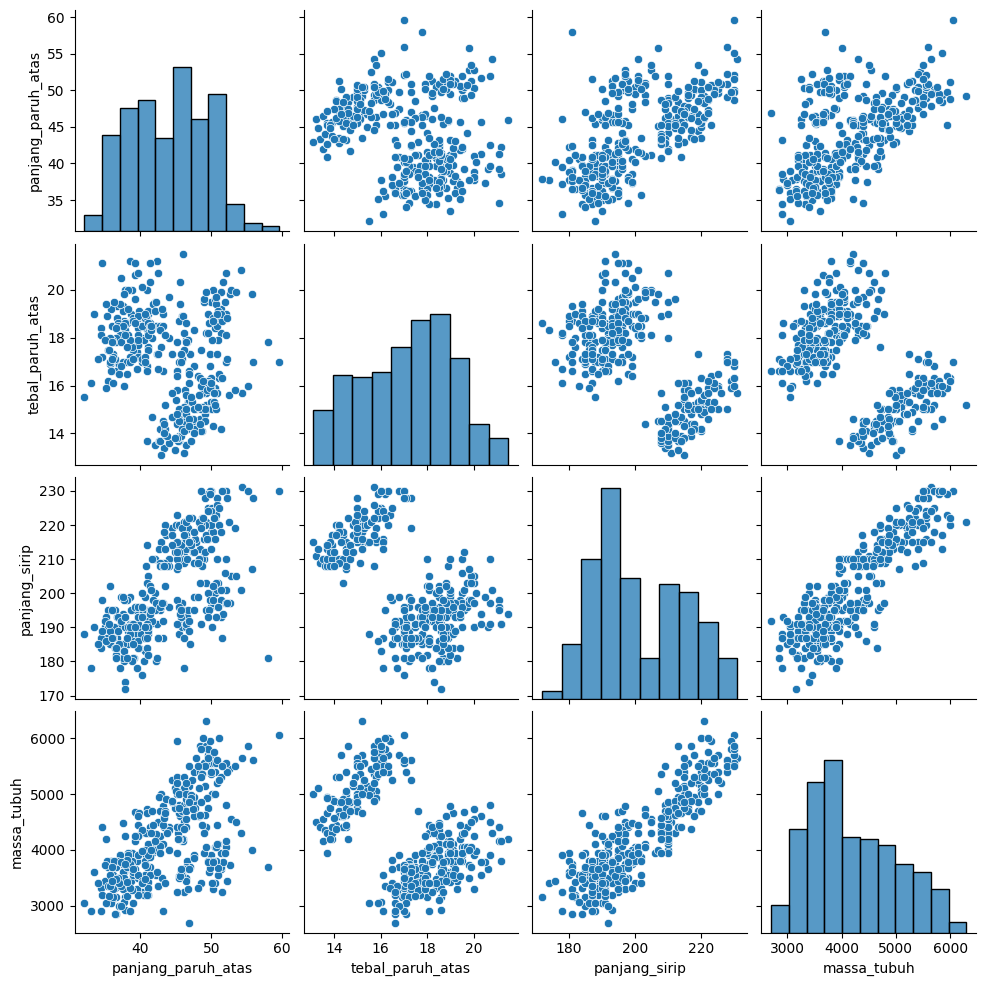

In [14]:
# Menggunakan pair plot untuk memahami distribusi data sebuah atribut dan hubungan dengan atribut lain
sns.pairplot(df)
plt.show()

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Saya memilih atribut *tebal_paruh_atas* dan *massa_tubuh* karena adanya persebaran yang membuat clustering dapat dilakukan

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


In [63]:
kmeans_df = df.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
kmeans_df.drop(columns=['pulau_habitat', 'jenis_kelamin', 'panjang_paruh_atas', 'panjang_sirip'], inplace=True)

In [65]:
kmeans_df.head()

,tebal_paruh_atas,massa_tubuh
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(kmeans_df))
data_scaled

,0,1
0,0.783487,-0.571229
1,0.121896,-0.509011
2,0.427246,-1.193405
3,1.088836,-0.944535
4,1.750427,-0.695664
...,...,...
329,-1.761093,0.890886
330,-1.455743,0.797560
331,-0.743261,1.917477
332,-1.201285,1.233083


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [73]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for i in range (2, 6):
    KMean= KMeans(n_clusters=i)
    KMean.fit(data_scaled)
    label=KMean.predict(data_scaled)
    print(f'Silhouette Score(n={i}): {silhouette_score(data_scaled, label)}')

Silhouette Score(n=2): 0.6188173938277177
Silhouette Score(n=3): 0.49644633679102124
Silhouette Score(n=4): 0.46455074500252125
Silhouette Score(n=5): 0.3981736226508911


8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

Nilai K yang dipilih adalah 2, karena memiliki silhouette score paling tinggi

In [75]:
KMean= KMeans(n_clusters=2)
KMean.fit(data_scaled)
label=KMean.predict(data_scaled)

9. Visualisasikan klaster yang ada [5]

<AxesSubplot: xlabel='tebal_paruh_atas', ylabel='massa_tubuh'>

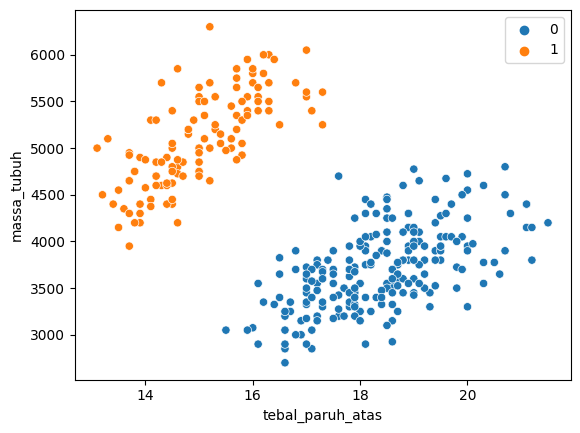

In [78]:
sns.scatterplot(x = kmeans_df['tebal_paruh_atas'],y = kmeans_df['massa_tubuh'], hue=label)

10. Berikan interpretasi dari klaster yang dihasilkan [5]

Terdapat dua kluster. Burung pada kluster 0 memiliki ciri khas massa tubuh tinggi dengan paruh atas yang cenderung lebih tipis. Burung pada kluster 1 memiliki ciri khas paruh atas tebal dan massa tubuh yang rendah

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [79]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
model.fit(data_scaled)
label = model.labels_

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

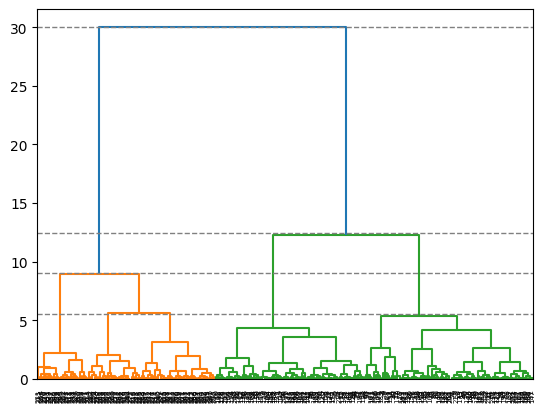

In [85]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=12.4, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=9, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=5.5, c='grey', lw=1, linestyle='dashed')
plt.show()

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [86]:
model = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=2)
model.fit(data_scaled)
label = model.labels_

14. Visualisasikan hasil *clustering assignment* [4]

<AxesSubplot: xlabel='tebal_paruh_atas', ylabel='massa_tubuh'>

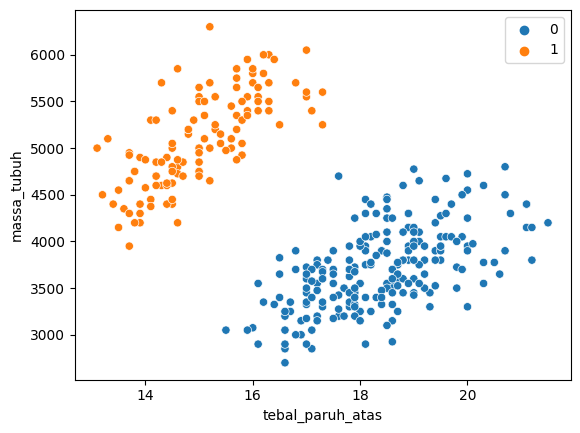

In [87]:
sns.scatterplot(x = kmeans_df['tebal_paruh_atas'],y = kmeans_df['massa_tubuh'], hue=model.labels_)

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]

Terdapat 2 cara penanganan categorical feature:
1. Label Encoding: Konversi nilai kategori menjadi nilai angka
2. One-hot encoding: Membuat kolom baru untuk setiap nilai kategori yang ada. Kolom akan bernilai 1 jika data memiliki nilai kategori tersebut, 0 jika tidak

16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]

K-Means tidak dapat diterapkan pada dataset non-globular. Hal ini dikarenakan K-Means mengelompokkan cluster berdasarkan centroids atau titik tengah cluster. Sebuah data akan masuk kedalam cluster yang memiliki centroids terdekat dengan data tersebut. Jika data berbentuk non-globular maka akan besar kemungkinan terjadi kesalahan karena data akan lebih dekat kepada centroids yang salah, dan dikategorikan sebagai cluster yang salah.

17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]

Tidak. Metode K-Means dari scikitlearn akan memberikan hasil yang mirip tapi tidak sama.
Dalam K-Means, centroids akan digeser secara iteratif agar dapat membagi data secara lebih baik. Iterasi akan converge menuju nilai yang optimal dan cenderung akan mirip satu sama lain. 
Adapun argumen dalam K-Means, n_init adalah jumlah iterasi K-Means yang akan dijalankan dengan centroids yang berbeda. Secara default memiliki nilai 10. K-Means akan dijalankan 10 kali dan diambil hasil yang terbaik. Hasil yang terbaik tersebut akan jauh lebih mirip satu sama lain, daripada jika K-Means hanya dijalankan 1 kali.


18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

Intra-cluster similarity menghitung jumlah dari kuadrat jarak euclidean antara centroid dengan data lain dalam cluster tersebut.
Inter-cluster disimilarity menghitung jumlah dari kuadrat jarak euclidean antara centroid dengan centroid dari cluster lain. Cluster dianggap baik apabila memiliki nilai intra-cluster similarity yang rendah dan nilai inter-cluster disimilarity yang tinggi.